In [7]:
import requests
from bs4 import BeautifulSoup


# Simulando um navegador
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36',
    'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive'
}

def scrape_cnn_news():
    # URL do site
    urls = "https://www.cnnbrasil.com.br/tudo-sobre/brasil/", "https://www.cnnbrasil.com.br/tudo-sobre/crimes/"
    
    # Cabeçalho para evitar bloqueios
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
    }
    news_data = []
    for url in urls:
        # Requisição à página
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            raise Exception(f"Erro ao acessar o site: {response.status_code}")
        
        # Parse do conteúdo HTML
        soup = BeautifulSoup(response.content, "html.parser")
        
        # Selecionar o container principal das notícias
        news_items = soup.find_all("li", class_="home__list__item")
        
        
        for item in news_items:
            # Extrair o título
            title_tag = item.find("h3", class_="news-item-header__title")
            title = title_tag.text.strip() if title_tag else "Título não encontrado"
            
            # # Extrair o link
            # link_tag = item.find("a", href=True)
            # link = link_tag["href"] if link_tag else "Link não encontrado"
            
            # # Extrair a data de publicação
            # date_tag = item.find("span", class_="home__title__date")
            # date = date_tag.text.strip() if date_tag else "Data não encontrada"
            
            news_data.append(
                title
                # "link": link,
                # "date": date
            )
        
    return news_data

news_data = scrape_cnn_news()


In [8]:
news_data



['Presidente eleito do Uruguai vai a Brasília nesta quinta para reunião com Lula',
 'Zelensky diz à CNN que a posição de Lula em relação à guerra é fraca',
 'PF extradita foragido da justiça do Paraguai para o Brasil',
 'General Mario Fernandes disse ao Congresso que ameaça terrorista estava próxima do Brasil',
 'Brasil é o país que mais paga juros de dívida no mundo, aponta estudo',
 'Brasil fará intercâmbios para aprender sobre “cidades-esponja”na China',
 'Ministério da Agricultura confirma abertura de 4 mercados da China para produtos brasileiros',
 'Habitação urbana, tecnologia nuclear e agro: veja os 37 acordos assinados entre Brasil e China',
 'Brasil perde quase sete milhões de leitores em quatro anos, diz pesquisa',
 'China deve abrir mercado para uvas, sorgo e gergelim do Brasil',
 'Brasil, ONU e Unesco lançam aliança global contra desinformação sobre o clima',
 'Brasil assina protocolo para importar gás natural da Argentina',
 'Argentina confirma que aderiu à Aliança Global 

In [9]:
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
import os 
from dotenv import load_dotenv

# Carregar as variáveis do .env
load_dotenv('../.env')

exemplos = '''
Positivas:
"Como funciona a licença menstrual no Brasil? Conheça empresas que já aderiram"
"Com fósseis de fezes e vômito, cientistas reconstroem a ascensão e o domínio dos dinossauros"
"Trump anuncia general como enviado especial para terminar com guerra na Ucrânia; veja o plano"
"Menino de 5 anos ajuda mãe que entrou em trabalho de parto 20 dias antes do previsto em MG"

Negativas:
"Acidente na Transpetro: quem são os funcionários que morreram em Angra dos Reis"
"Alerta máximo, sirenes acionadas e um morto: acumulado de chuva em Salvador é o triplo do esperado para o mês"
"Médico responsável por hidrolipo em que mulher morreu em SP já foi processado 21 vezes por erro"
"Golpe do amor: idoso do RS que acreditava estar se relacionando com investidora americana perde mais de R$ 2 milhões, diz polícia"

Neutras:
"Deputados começam a recolher assinaturas para PEC de corte de gastos alternativa à do governo"
"Dieta do ovo: comer um, dez ou dezenas funciona para emagrecer e ganhar músculos? Quais os riscos?"
"iFood anuncia mudança no código de entrega; entenda como irá funcionar"
"TV 4K: 5 dicas para melhorar a imagem da televisão"'''
metaprompt = f"""
Você é um experiente engenheiro de prompt, crie um prompt para instruir um modelo LLM para fazer uma análise de sentimentos se baseando nos exemplos{exemplos} para classificar as notícias{news_data} em positivas, neutras e negativas.
"""


# Executando o prompt com o modelo Gemini

gemini_api_key = os.getenv("GEMINI_API_KEY")
genai.configure(api_key=gemini_api_key)
safety_settings={
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}


model = genai.GenerativeModel("gemini-1.5-flash",)
response = model.generate_content(metaprompt, safety_settings=safety_settings)

In [10]:
new_prompt = response.text
print(new_prompt)

```
Classifique as seguintes notícias em positivas, negativas ou neutras, baseando-se nos exemplos fornecidos.  Considere o tom geral da notícia e o impacto potencial dos eventos descritos.

**Exemplos:**

**Positivas:**

* "Como funciona a licença menstrual no Brasil? Conheça empresas que já aderiram"  (Notícia informativa com potencial impacto positivo para as mulheres)
* "Com fósseis de fezes e vômito, cientistas reconstroem a ascensão e o domínio dos dinossauros" (Descoberta científica interessante e sem conotação negativa)
* "Trump anuncia general como enviado especial para terminar com guerra na Ucrânia; veja o plano" (Notícia política com potencial impacto positivo, embora controversa)
* "Menino de 5 anos ajuda mãe que entrou em trabalho de parto 20 dias antes do previsto em MG" (História inspiradora com final positivo)

**Negativas:**

* "Acidente na Transpetro: quem são os funcionários que morreram em Angra dos Reis" (Notícia trágica com perdas humanas)
* "Alerta máximo, siren

In [ ]:
new_prompt = response.text
gemini_api_key = os.getenv("GEMINI_API_KEY")
genai.configure(api_key=gemini_api_key)


safety_settings={
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}


model = genai.GenerativeModel("gemini-1.5-pro",)
responsee = model.generate_content(new_prompt, safety_settings=safety_settings)

In [16]:
final_response = responsee.text
print(final_response)

## Classificação das Notícias:

**1. Presidente eleito do Uruguai vai a Brasília nesta quinta para reunião com Lula:** **Neutra.**  Trata-se de uma visita diplomática, sem conotação positiva ou negativa inerente.

**2. Zelensky diz à CNN que a posição de Lula em relação à guerra é fraca:** **Negativa.** Crítica à posição do presidente brasileiro, potencialmente gerando tensões diplomáticas.

**3. PF extradita foragido da justiça do Paraguai para o Brasil:** **Positiva.**  Contribui para a justiça e segurança, representando um avanço na cooperação policial internacional.

**4. General Mario Fernandes disse ao Congresso que ameaça terrorista estava próxima do Brasil:** **Negativa.**  Alerta sobre ameaça à segurança nacional, gerando preocupação.

**5. Brasil é o país que mais paga juros de dívida no mundo, aponta estudo:** **Negativa.** Impacto negativo na economia brasileira.

**6. Brasil fará intercâmbios para aprender sobre “cidades-esponja”na China:** **Positiva.**  Busca por soluçõe

In [ ]:
import json
import re

def response_to_json(text):
    """
    Transforma o texto retornado lepo llm em formato de JSON.
    
    Args:
        text: O texto bruto contendo as notícias.
        
    Returns:
        str: JSON formatado contendo todas as notícias.
    """
    # Separar as notícias usando "\n\n"
    news_items = text.strip().split("\n\n")
    
    # Armazenar as notícias
    formatted_news = []
    
    # Rejex para identificar o padrão das manchetes 
    pattern = r"^\*\*\d+\.\s(.+?):\*\*\s\*\*(.+?)\.\*\*\s(.+)$"
    
    for item in news_items:
        match = re.match(pattern, item.strip())
        if match:
            title = match.group(1).strip()
            evaluation = match.group(2).strip()
            explanation = match.group(3).strip()
            
            formatted_news.append({
                "title": title,
                "evaluation": evaluation,
                "explanation": explanation
            })
    
    # Converter para JSON formatado
    return json.dumps(formatted_news, ensure_ascii=False, indent=4)

In [ ]:
json = response_to_json(final_response)

In [28]:
print(json)

[
    {
        "title": "Presidente eleito do Uruguai vai a Brasília nesta quinta para reunião com Lula",
        "evaluation": "Neutra",
        "explanation": "Trata-se de uma visita diplomática, sem conotação positiva ou negativa inerente."
    },
    {
        "title": "Zelensky diz à CNN que a posição de Lula em relação à guerra é fraca",
        "evaluation": "Negativa",
        "explanation": "Crítica à posição do presidente brasileiro, potencialmente gerando tensões diplomáticas."
    },
    {
        "title": "PF extradita foragido da justiça do Paraguai para o Brasil",
        "evaluation": "Positiva",
        "explanation": "Contribui para a justiça e segurança, representando um avanço na cooperação policial internacional."
    },
    {
        "title": "General Mario Fernandes disse ao Congresso que ameaça terrorista estava próxima do Brasil",
        "evaluation": "Negativa",
        "explanation": "Alerta sobre ameaça à segurança nacional, gerando preocupação."
    },
  

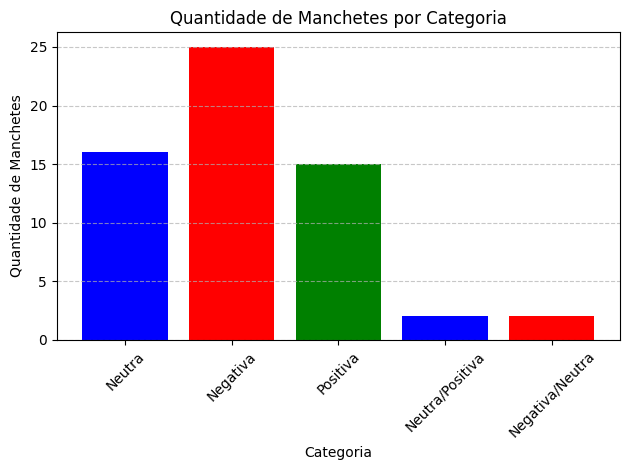

In [29]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# JSON formatado gerado na etapa anterior
news_json = """
[
    {
        "title": "Presidente eleito do Uruguai vai a Brasília nesta quinta para reunião com Lula",
        "evaluation": "Neutra",
        "explanation": "Trata-se de uma visita diplomática, sem conotação positiva ou negativa inerente."
    },
    {
        "title": "Zelensky diz à CNN que a posição de Lula em relação à guerra é fraca",
        "evaluation": "Negativa",
        "explanation": "Crítica à posição do presidente brasileiro, potencialmente gerando tensões diplomáticas."
    },
    {
        "title": "PF extradita foragido da justiça do Paraguai para o Brasil",
        "evaluation": "Positiva",
        "explanation": "Contribui para a justiça e segurança, representando um avanço na cooperação policial internacional."
    },
    {
        "title": "General Mario Fernandes disse ao Congresso que ameaça terrorista estava próxima do Brasil",
        "evaluation": "Negativa",
        "explanation": "Alerta sobre ameaça à segurança nacional, gerando preocupação."
    },
    {
        "title": "Brasil é o país que mais paga juros de dívida no mundo, aponta estudo",
        "evaluation": "Negativa",
        "explanation": "Impacto negativo na economia brasileira."
    },
    {
        "title": "Brasil fará intercâmbios para aprender sobre “cidades-esponja”na China",
        "evaluation": "Positiva",
        "explanation": "Busca por soluções inovadoras para problemas urbanos, com potencial benefício para o país."
    },
    {
        "title": "Ministério da Agricultura confirma abertura de 4 mercados da China para produtos brasileiros",
        "evaluation": "Positiva",
        "explanation": "Expansão do comércio exterior, com impacto positivo na economia."
    },
    {
        "title": "Habitação urbana, tecnologia nuclear e agro: veja os 37 acordos assinados entre Brasil e China",
        "evaluation": "Positiva",
        "explanation": "Fortalecimento das relações e cooperação internacional, com potencial impacto positivo em diversas áreas."
    },
    {
        "title": "Brasil perde quase sete milhões de leitores em quatro anos, diz pesquisa",
        "evaluation": "Negativa",
        "explanation": "Declínio da leitura, com impacto negativo na educação e cultura."
    },
    {
        "title": "China deve abrir mercado para uvas, sorgo e gergelim do Brasil",
        "evaluation": "Positiva",
        "explanation": "Mais uma notícia positiva para o comércio exterior brasileiro."
    },
    {
        "title": "Brasil, ONU e Unesco lançam aliança global contra desinformação sobre o clima",
        "evaluation": "Positiva",
        "explanation": "Iniciativa importante para combater a desinformação e promover ações em relação às mudanças climáticas."
    },
    {
        "title": "Brasil assina protocolo para importar gás natural da Argentina",
        "evaluation": "Neutra",
        "explanation": "Acordo comercial, sem conotação claramente positiva ou negativa, dependendo da avaliação dos termos."
    },
    {
        "title": "Argentina confirma que aderiu à Aliança Global contra a Fome e a Pobreza",
        "evaluation": "Positiva",
        "explanation": "Aderir a uma iniciativa contra a fome é um passo positivo."
    },
    {
        "title": "Brasil diz que Argentina participará da Aliança Global contra a Fome e a Pobreza",
        "evaluation": "Positiva",
        "explanation": "Reforça a notícia anterior."
    },
    {
        "title": "Linkin Park faz show em SP no dia do lançamento do novo álbum",
        "evaluation": "Neutra/Positiva",
        "explanation": "Notícia de entretenimento, positiva para os fãs da banda."
    },
    {
        "title": "MRV tem lucro líquido de R$ 17,3 milhões no terceiro trimestre",
        "evaluation": "Neutra",
        "explanation": "Informação financeira sem conotação claramente positiva ou negativa, dependendo da expectativa de lucro."
    },
    {
        "title": "​Brasil oferece ajuda humanitária ao Sudão após intensificação de conflitos",
        "evaluation": "Positiva",
        "explanation": "Ato humanitário com impacto positivo para a população afetada."
    },
    {
        "title": "Ator Rami Malek desembarca em SP meses depois de ser flagrado no RJ",
        "evaluation": "Neutra",
        "explanation": "Notícia sobre a vida de celebridades, sem impacto relevante."
    },
    {
        "title": "Brasil x Uruguai: veja os preços dos ingressos para jogo na Arena Fonte Nova",
        "evaluation": "Neutra",
        "explanation": "Informação para os torcedores, sem conotação positiva ou negativa."
    },
    {
        "title": "Brasil “dribla” pressão da China por Nova Rota da Seda e usa vitória de Trump para extrair concessões em visita de Xi",
        "evaluation": "Neutra/Positiva",
        "explanation": "Dependendo da perspectiva, pode ser visto como uma estratégia diplomática bem-sucedida."
    },
    {
        "title": "Volta de Trump mudará diplomacia dos EUA; qual o impacto para o Brasil?",
        "evaluation": "Neutra",
        "explanation": "Especulação sobre política internacional, sem conotação definida."
    },
    {
        "title": "Bolsa da Argentina lidera ranking de ganhos em 2024; Ibovespa está em penúltimo",
        "evaluation": "Negativa",
        "explanation": "Notícia negativa para o mercado financeiro brasileiro."
    },
    {
        "title": "Andrew Garfield interpretou brasileiro em filme e já veio ao Brasil para jogo de futebol",
        "evaluation": "Neutra",
        "explanation": "Curiosidade sobre a vida de celebridades, sem impacto relevante."
    },
    {
        "title": "Venezuela: número 2 de embaixada do Brasil é convocado e escuta queixas de chanceler",
        "evaluation": "Negativa",
        "explanation": "Indica tensão diplomática entre os países."
    },
    {
        "title": "Crise com Venezuela faz embaixadora brasileira cancelar férias",
        "evaluation": "Negativa",
        "explanation": "Reflexo da crise diplomática entre os países."
    },
    {
        "title": "Ala do PT impede governo Lula de romper com Maduro, dizem fontes",
        "evaluation": "Neutra",
        "explanation": "Disputa política interna, sem conotação claramente definida."
    },
    {
        "title": "Por que a bandeira da Venezuela possui oito estrelas?",
        "evaluation": "Neutra",
        "explanation": "Informação histórica/cultural, sem conotação positiva ou negativa."
    },
    {
        "title": "Venezuela x Brasil: entenda o que significa convocar embaixador para consultas",
        "evaluation": "Neutra",
        "explanation": "Informação sobre diplomacia, sem conotação positiva ou negativa inerente."
    },
    {
        "title": "Além do Brasil, Venezuela já teve conflitos com outros países vizinhos",
        "evaluation": "Neutra",
        "explanation": "Contexto histórico das relações internacionais da Venezuela."
    },
    {
        "title": "Padilha diz que regulamentação da reforma tributária deve sofrer alterações",
        "evaluation": "Neutra",
        "explanation": "Informação sobre o processo legislativo, sem conotação definida."
    },
    {
        "title": "Data do próximo aniversário de Bolsonaro é determinante para ele não perder benefício",
        "evaluation": "Neutra",
        "explanation": "Informação sobre trâmites legais, sem conotação claramente positiva ou negativa."
    },
    {
        "title": "Brasileiros procurados pela Interpol são presos no Aeroporto Internacional de MG",
        "evaluation": "Positiva",
        "explanation": "Contribui para a justiça e segurança."
    },
    {
        "title": "Relembre o caso do Maníaco do Parque, tema de filme que estreia hoje",
        "evaluation": "Negativa",
        "explanation": "Aborda um crime hediondo, mesmo que no contexto de um lançamento de filme."
    },
    {
        "title": "Sargento da PM tem carro fuzilado e é morto a tiros no RJ",
        "evaluation": "Negativa",
        "explanation": "Notícia de violência e morte."
    },
    {
        "title": "Advogado é morto a tiros em frente a escritório em Goiás",
        "evaluation": "Negativa",
        "explanation": "Notícia de violência e morte."
    },
    {
        "title": "STF define tese para que tribunal possa anular absolvição em júri",
        "evaluation": "Neutra",
        "explanation": "Decisão judicial com potencial impacto em processos jurídicos, sem conotação claramente definida."
    },
    {
        "title": "Influenciador é alvo de operação contra importação criminosa de smartphones",
        "evaluation": "Negativa",
        "explanation": "Notícia sobre crime."
    },
    {
        "title": "Saiba quem é o Maníaco da Cruz, que jogou urina em policial penal",
        "evaluation": "Negativa",
        "explanation": "Notícia sobre um criminoso e suas ações."
    },
    {
        "title": "Do atirador do cinema ao Maníaco do Parque: veja situação de presos por crimes famosos",
        "evaluation": "Negativa",
        "explanation": "Aborda crimes violentos."
    },
    {
        "title": "Grupo é preso por vender produtos e lubrificante de cannabis para todo Brasil",
        "evaluation": "Negativa",
        "explanation": "Notícia sobre crime, dependendo da legislação em relação à cannabis."
    },
    {
        "title": "Quase 700 presos são recapturados em SP cinco dias após “saidinha” temporária",
        "evaluation": "Positiva",
        "explanation": "Para a segurança pública, a recaptura de foragidos é positiva."
    },
    {
        "title": "Saiba quem são os criminosos mais procurados do Brasil",
        "evaluation": "Negativa",
        "explanation": "Lista de criminosos perigosos."
    },
    {
        "title": "RJ: polícia prende homem flagrado provocando incêndio que devastou área de proteção ambiental; assista",
        "evaluation": "Positiva",
        "explanation": "Prisão de alguém cometendo crime ambiental."
    },
    {
        "title": "Blitz em feira de cães acaba com briga generalizada; veja imagens",
        "evaluation": "Negativa",
        "explanation": "Conflito e violência."
    },
    {
        "title": "Caso do Pix falso deve levar Nego Di a denúncias por “mais de mil crimes”; entenda",
        "evaluation": "Negativa",
        "explanation": "Notícia sobre possível crime."
    },
    {
        "title": "Com menos crimes de rua, Brasil registra 1 estelionato a cada 16 segundos",
        "evaluation": "Negativa",
        "explanation": "Ainda que haja redução de crimes de rua, a alta taxa de estelionato é um problema."
    },
    {
        "title": "Peculato, lavagem e associação criminosa: entenda os crimes pelos quais Bolsonaro foi indiciado",
        "evaluation": "Negativa",
        "explanation": "Notícia sobre acusações criminais."
    },
    {
        "title": "Maioria dos países americanos adota critérios objetivos para diferenciar usuários de traficantes",
        "evaluation": "Positiva",
        "explanation": "Avanço na política de drogas, com potencial impacto positivo."
    },
    {
        "title": "Pornografia infantil pode se tornar crime hediondo no Brasil; entenda",
        "evaluation": "Positiva",
        "explanation": "Endurecimento da lei contra um crime grave."
    },
    {
        "title": "Crimes do inquérito de ministro de Lula têm penas somadas que vão de 15 a 46 anos",
        "evaluation": "Negativa",
        "explanation": "Notícia sobre crimes e suas possíveis penas."
    },
    {
        "title": "Suspeito de fornecer cetamina que matou ex-sinhazinha se entrega em Manaus",
        "evaluation": "Negativa/Neutra",
        "explanation": "Notícia sobre crime e entrega do suspeito (neutra em relação à justiça)."
    },
    {
        "title": "Entenda artigo usado pelo STF para tornar Moro réu por calúnia contra Gilmar",
        "evaluation": "Negativa",
        "explanation": "Notícia sobre processo judicial por calúnia."
    },
    {
        "title": "“Saidinhas” de presos previstas para junho estão mantidas em SP, diz TJ",
        "evaluation": "Neutra",
        "explanation": "Informação sobre o sistema prisional, sem conotação definida.  Pode ser vista como negativa por parte da população que se sente insegura."
    },
    {
        "title": "Polícia Civil faz buscas em sítio no Rio de Janeiro e tenta localizar advogada Anic Herdy",
        "evaluation": "Negativa/Neutra",
        "explanation": "Implica um possível desaparecimento ou crime, mas ainda sem confirmação."
    },
    {
        "title": "Senado aprova projeto que classifica como hediondo crimes contra agentes do Estado",
        "evaluation": "Neutra",
        "explanation": "Alteração legislativa, sem conotação claramente definida, depende da perspectiva."
    },
    {
        "title": "Segunda temporada de Linha Direta estreia com Caso Beatriz; relembre",
        "evaluation": "Negativa",
        "explanation": "Programa que aborda um crime."
    },
    {
        "title": "Polícia prende casal responsável por “casa bomba” em apartamento na região central de SP",
        "evaluation": "Positiva",
        "explanation": "Prisão de criminosos."
    },
    {
        "title": "Policial da Austrália é acusado de assassinar seu ex-namorado e o atual dele",
        "evaluation": "Negativa",
        "explanation": "Notícia sobre crime grave."
    },
    {
        "title": "Morre policial militar baleado na cabeça em BH",
        "evaluation": "Negativa",
        "explanation": "Morte de um policial."
    },
    {
        "title": "Policial baleado na cabeça em BH tem quadro irreversível, diz PM",
        "evaluation": "Negativa",
        "explanation": "Notícia sobre a gravidade do ferimento de um policial, com provável desfecho negativo."
    }
]
"""

# Carregar o JSON
news_data = json.loads(news_json)

# Contar as avaliações
evaluation_counts = Counter(item['evaluation'] for item in news_data)

# Criar o gráfico de barras
plt.bar(evaluation_counts.keys(), evaluation_counts.values(), color=['blue', 'red', 'green'])

# Adicionar rótulos e título
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Manchetes')
plt.title('Quantidade de Manchetes por Categoria')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()
